In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from main.alpaca import *
from main.datagen import *
from main.dataViz import *

In [2]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
config

{'data_horizon': 10,
 'test_horizon': 10,
 'row_length': 20,
 'num_class_samples': 50,
 'x_dim': 567,
 'y_dim': 63,
 'sigma_eps': 0.005,
 'lr': 0.0001,
 'nn_layers': [256, 256, 256, 256],
 'activation': 'tanh',
 'num_input_points': 10,
 'num_hand_points': 21,
 'input_dim': 3,
 'shuffle': False,
 'action': 'open_wallet'}

In [4]:
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
row_length = config['row_length']
action_label = config['action']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/test/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)

len_train_dataset = train_dataset.__len__()
num_samples_train = len_train_dataset
Y1, X1, init1 = train_dataset.sample_trajectories(num_samples_train)
Y2, X2, init2 = train_dataset.sample_trajectories(num_samples_train)
print('Y1 size', Y1.shape)
print('X1 size', X1.shape)
print('init1 size', init1.shape)
print('Y2 size', Y2.shape)
print('X2 size', X2.shape)
print('init2 size', init2.shape)
print()

len_test_dataset = test_dataset.__len__()
num_samples_test = len_test_dataset
Y_test1, X_test1, init_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test2, X_test2, init_test2 = test_dataset.sample_trajectories(num_samples_test)
print('Y_test1 size', Y_test1.shape)
print('X_test1 size', X_test1.shape)
print('init_test1 size', init_test1.shape)
print('Y_test2 size', Y_test2.shape)
print('X_test2 size', X_test2.shape)
print('init_test2 size', init_test2.shape)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

Y1 size (7, 20, 63)
X1 size (7, 20, 567)
init1 size (7, 20, 63)
Y2 size (7, 20, 63)
X2 size (7, 20, 567)
init2 size (7, 20, 63)

Y_test1 size (2, 20, 63)
X_test1 size (2, 20, 567)
init_test1 size (2, 20, 63)
Y_test2 size (2, 20, 63)
X_test2 size (2, 20, 567)
init_test2 size (2, 20, 63)


loss: 287.68097
loss: 104.98588
loss: 94.01718
loss: 103.88101
loss: 61.666363
loss: 46.921112
loss: 2.5748262
loss: 39.187332
loss: 58.61428
loss: 56.343266
loss: 11.94802
loss: 20.098238
loss: 11.044926
loss: -8.032687
loss: -2.9404109
loss: -21.332247
loss: 26.0883
loss: -16.906876
loss: -34.87857
loss: -23.315575
loss: -19.656174
loss: -34.284107
loss: -34.371006
loss: -37.890884
loss: -51.10508
loss: -29.398052
loss: -25.879454
loss: -35.000015
loss: -42.298985
loss: -44.155014
loss: -48.432896
loss: -50.998634
loss: -43.02578
loss: -53.81249
loss: -51.59326
loss: -61.97149
loss: -65.34089
loss: -62.900604
loss: -70.58779
loss: -62.85699


/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


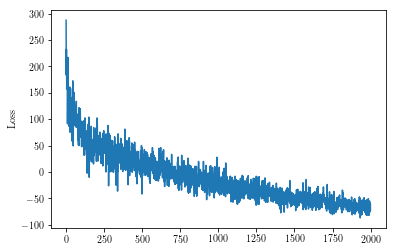

In [5]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, 2000, plot_loss=True)

In [6]:
rmse = agent1.test_rmse(sess1, X1, Y1)
print('Train RMSE:', rmse)

rmse = agent1.test_rmse(sess1, X_test1, Y_test1)
print('Test RMSE:', rmse)

Train RMSE: 1.9161541793579446
Test RMSE: 21.184812420292904


In [7]:
# from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d

def plot_hand_points(hand_points):
    x_coords = hand_points[::3]
    y_coords = hand_points[1::3]
    z_coords = hand_points[2::3]
    
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    hand_plot = ax.scatter(x_coords, y_coords, z_coords)
    
    def plot_finger(inds_array):
        for i in range(len(inds_array)-1):
            xs = (x_coords[inds_array[i]], x_coords[inds_array[i+1]])
            ys = (y_coords[inds_array[i]], y_coords[inds_array[i+1]])
            zs = (z_coords[inds_array[i]], z_coords[inds_array[i+1]])
            line_seg = plt3d.art3d.Line3D(xs, ys, zs)
            ax.add_line(line_seg)
        
    # Draw thumb
    thumb_inds = [0, 1, 6, 7, 8]
    plot_finger(thumb_inds)
    
    # Draw index
    index_inds = [0, 2, 9, 10, 11]
    plot_finger(index_inds)
    
    # Draw middle
    middle_inds = [0, 3, 12, 13, 14]
    plot_finger(middle_inds)
    
    # Draw ring
    ring_inds = [0, 4, 15, 16, 17]
    plot_finger(ring_inds)
    
    # Draw pinky
    pinky_inds = [0, 5, 18, 19, 20]
    plot_finger(pinky_inds)
        
    plt.show()

def plot_two_hands(hand_points1, hand_points2, save_fig = False, save_name = None):
    x_coords1 = hand_points1[::3]
    y_coords1 = hand_points1[1::3]
    z_coords1 = hand_points1[2::3]
    
    x_coords2 = hand_points2[::3]
    y_coords2 = hand_points2[1::3]
    z_coords2 = hand_points2[2::3]
    
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    hand_plot1 = ax.scatter(x_coords1, y_coords1, z_coords1)
    hand_plot2 = ax.scatter(x_coords2, y_coords2, z_coords2)
    
    def plot_finger(inds_array, x_coords, y_coords, z_coords, color='b'):
        for i in range(len(inds_array)-1):
            xs = (x_coords[inds_array[i]], x_coords[inds_array[i+1]])
            ys = (y_coords[inds_array[i]], y_coords[inds_array[i+1]])
            zs = (z_coords[inds_array[i]], z_coords[inds_array[i+1]])
            line_seg = plt3d.art3d.Line3D(xs, ys, zs, color=color)
            ax.add_line(line_seg)
        
    # Draw thumbs
    thumb_inds = [0, 1, 6, 7, 8]
    plot_finger(thumb_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(thumb_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw indexes
    index_inds = [0, 2, 9, 10, 11]
    plot_finger(index_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(index_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw middles
    middle_inds = [0, 3, 12, 13, 14]
    plot_finger(middle_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(middle_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw rings
    ring_inds = [0, 4, 15, 16, 17]
    plot_finger(ring_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(ring_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw pinkies
    pinky_inds = [0, 5, 18, 19, 20]
    plot_finger(pinky_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(pinky_inds, x_coords2, y_coords2, z_coords2, color='r')
        
    plt.show()
    
    if save_fig:
        plt.savefig(save_name)

(2, 20, 63)
(2, 20, 567)
(2, 20, 63)


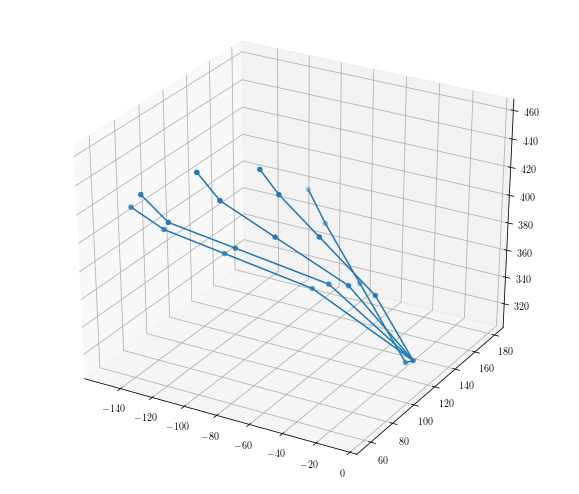

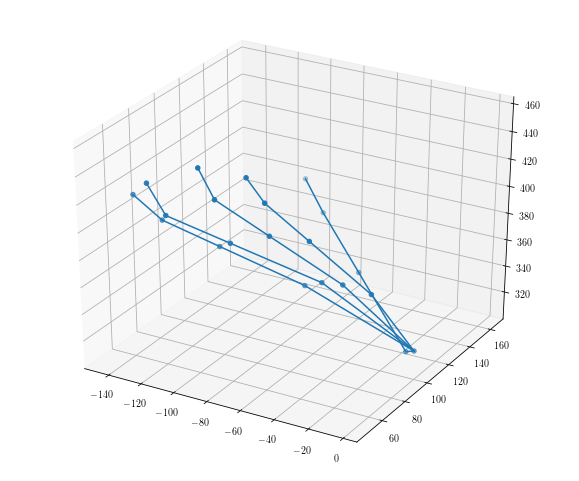

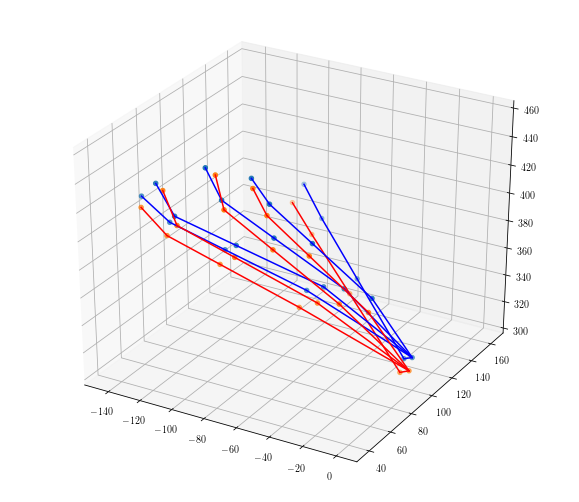

In [8]:
# Testing plotting code
print(Y_test1.shape)
print(X_test1.shape)
print(init_test1.shape)

plot_hand_points(init_test1[0, 0, :])
plot_hand_points(init_test1[0, 1, :])
hand1 = np.squeeze(X_test1[0, 0, 0:63]) + init_test1[0, 0, :]
hand2 = hand1 + np.squeeze(X_test1[0, 0, 63:126])
plot_two_hands(hand1, hand2)

x_test shape (20, 567)
y_test shape (20, 63)
next_positions shape (20, 63)


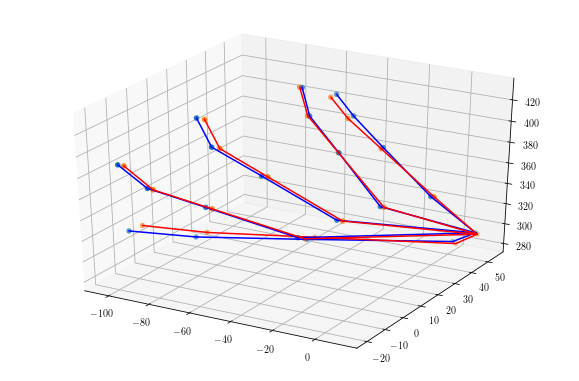

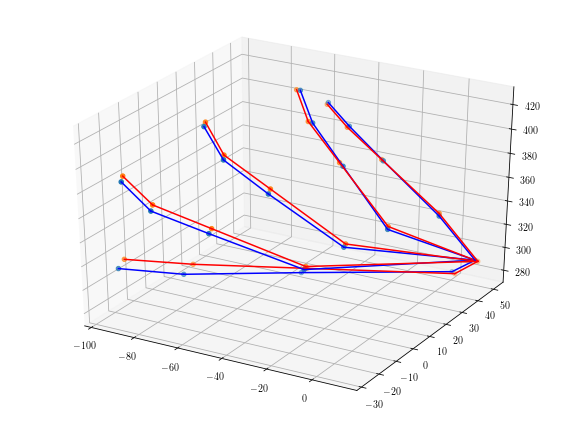

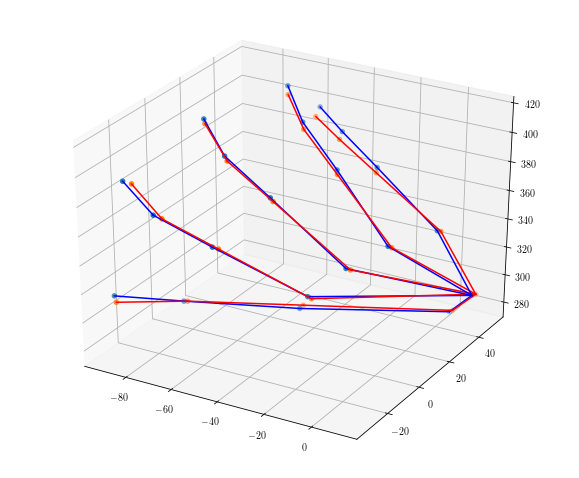

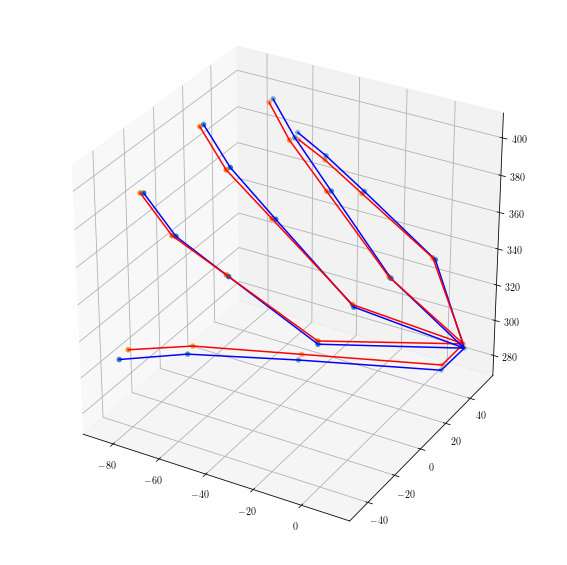

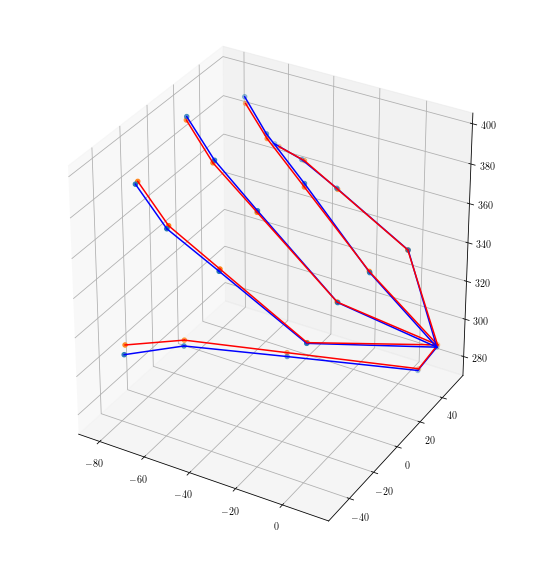

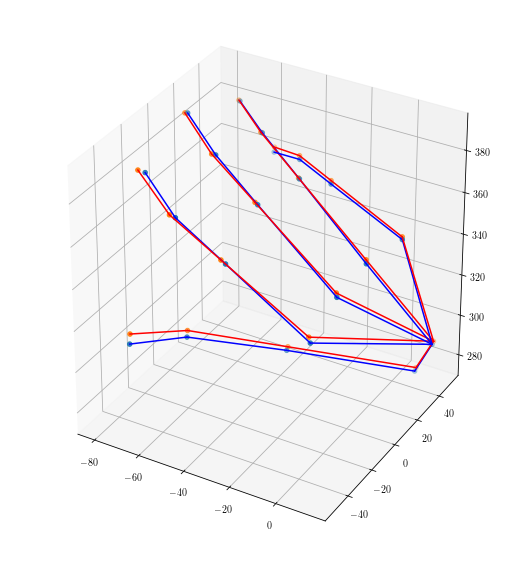

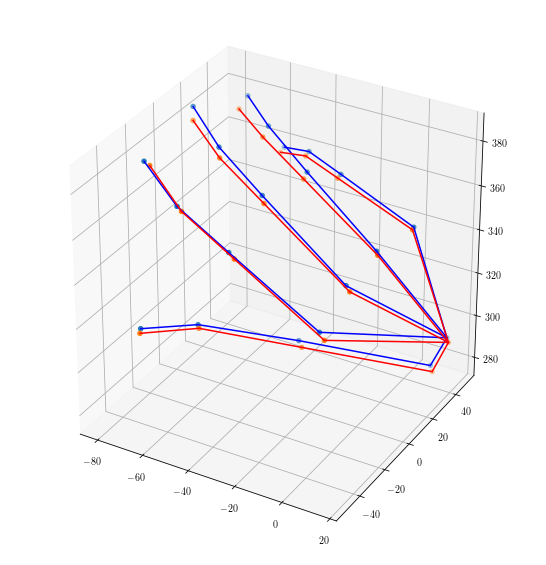

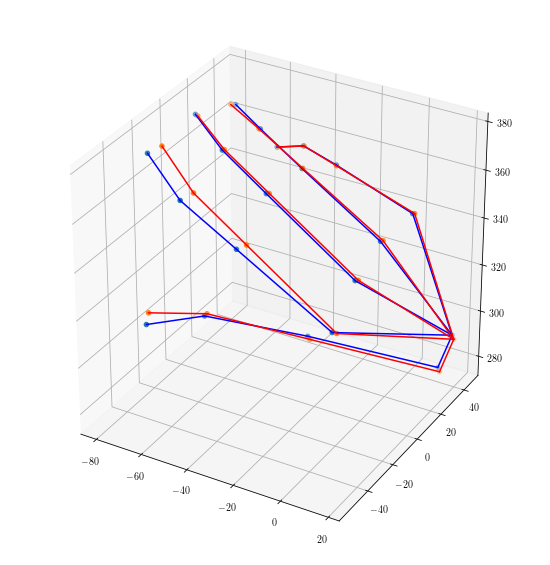

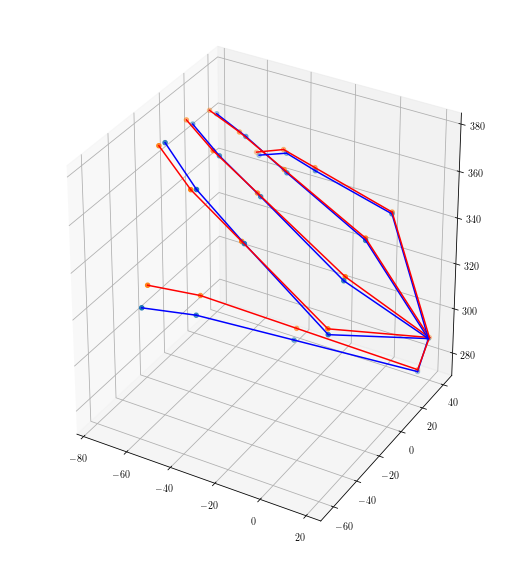

In [9]:
x_test = X_test1[0,:,:];
y_test = Y_test1[0,:,:];
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting 1 next step at a time
for i in range(1, 10):
    ux = x_test[:i, :]
    ux = np.expand_dims(ux, axis=0)
    uy = y_test[:i, :]
    uy = np.expand_dims(uy, axis=0)
    x = x_test[i, :]
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos = next_pos + np.squeeze(x[:,:,63*j:63*(j+1)])
        
    pred_hand = next_pos + np.squeeze(y)
    true_hand = next_pos + y_test[i, :]
    plot_two_hands(pred_hand, true_hand)

ux shape (1, 1, 567)
uy shape (1, 1, 63)
x shape (1, 1, 567)
X_test1 shape (2, 20, 567)
Y_test1 shape (2, 20, 63)
next_positions shape (20, 63)


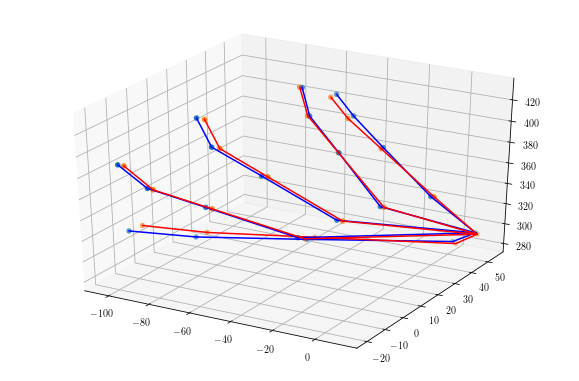

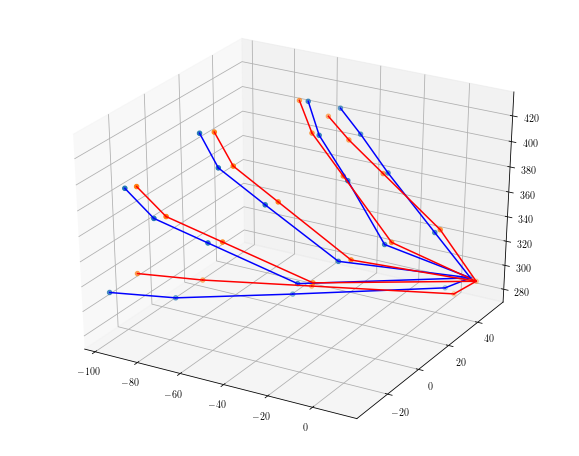

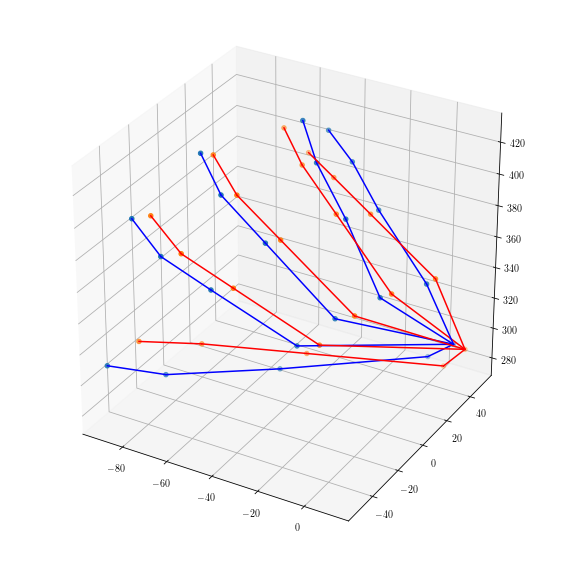

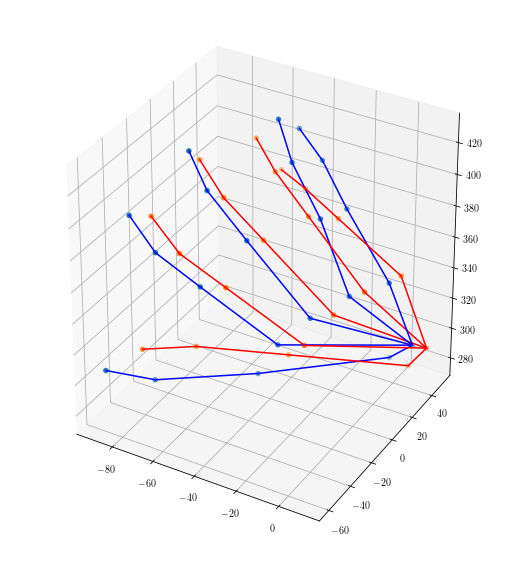

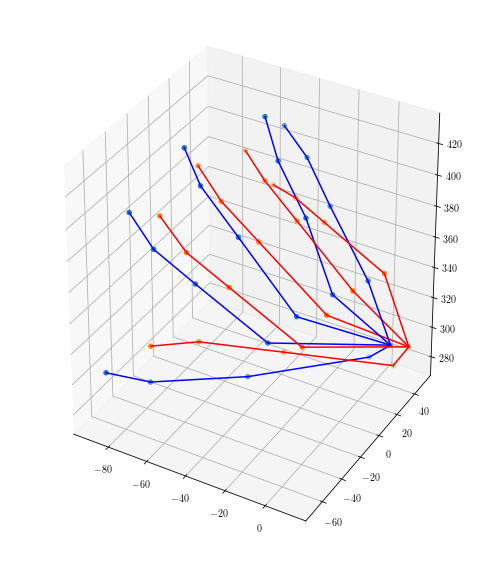

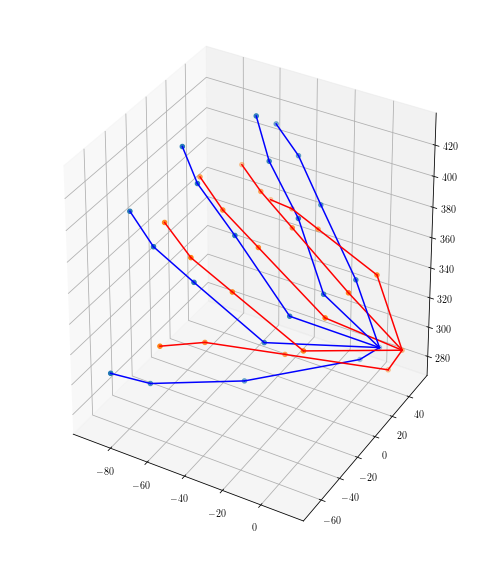

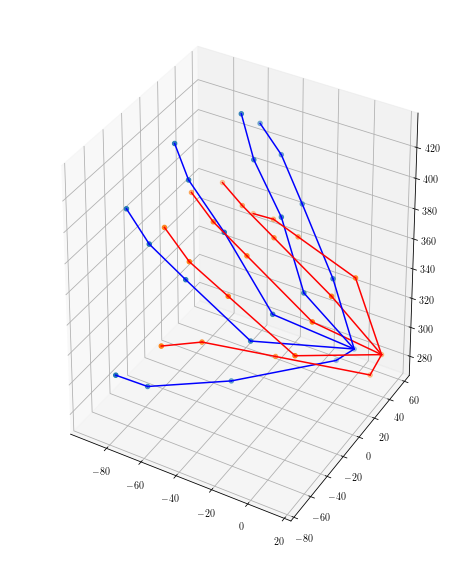

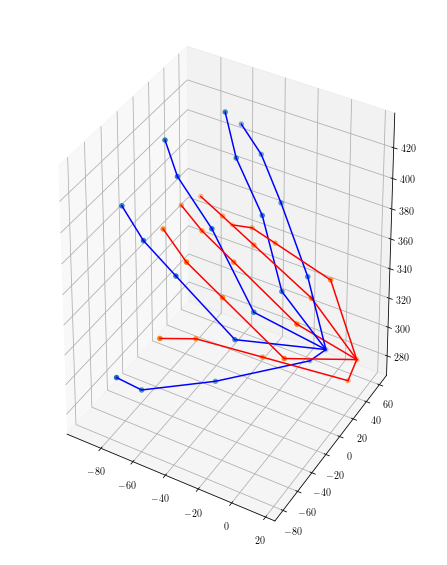

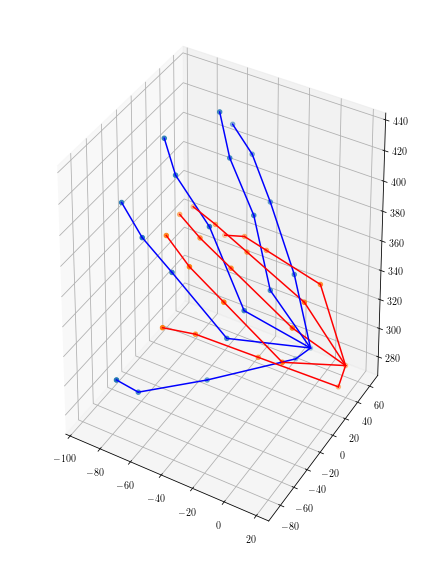

In [10]:
ux = X_test1[0,0,:]
uy = Y_test1[0,0,:]
ux = np.expand_dims(np.expand_dims(ux, axis=0), axis=0)
uy = np.expand_dims(np.expand_dims(uy, axis=0), axis=0)
x = X_test1[0,1,:]
x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
print('ux shape', ux.shape)
print('uy shape', uy.shape)
print('x shape', x.shape)

print('X_test1 shape', X_test1.shape)
print('Y_test1 shape', Y_test1.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting farther into the future
for i in range(1, 10):
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos_pred = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos_pred = next_pos_pred + np.squeeze(x[:,:,63*j:63*(j+1)])
    pred_hand = next_pos_pred + np.squeeze(y)
    
    next_pos_true = next_positions[i,:]
    for k in range(num_input_points - 1):
        next_pos_true = next_pos_true + np.squeeze(X_test1[0,i,63*k:63*(k+1)])
    true_hand = next_pos_true + Y_test1[0, i, :]
    
    plot_two_hands(pred_hand, true_hand)
    
    ux = np.concatenate((ux, x), axis=1)
    uy = np.concatenate((uy, y), axis=1)
    x = np.concatenate((x[:,:,63:], y), axis=2)